In [4]:
#  Netflix Dataset EDA - Machine Learning & Artificial Intelligence Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
# Visualization setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16

In [6]:
# Step 2: Load Dataset
df = pd.read_csv("/content/netflix_titles.csv")
print("✅ Dataset Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- Dataset Info ---")
print(df.info())

✅ Dataset Loaded Successfully!
Rows: 8807, Columns: 12

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [7]:
# Step 3: Preview the Data
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



--- Missing Values ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


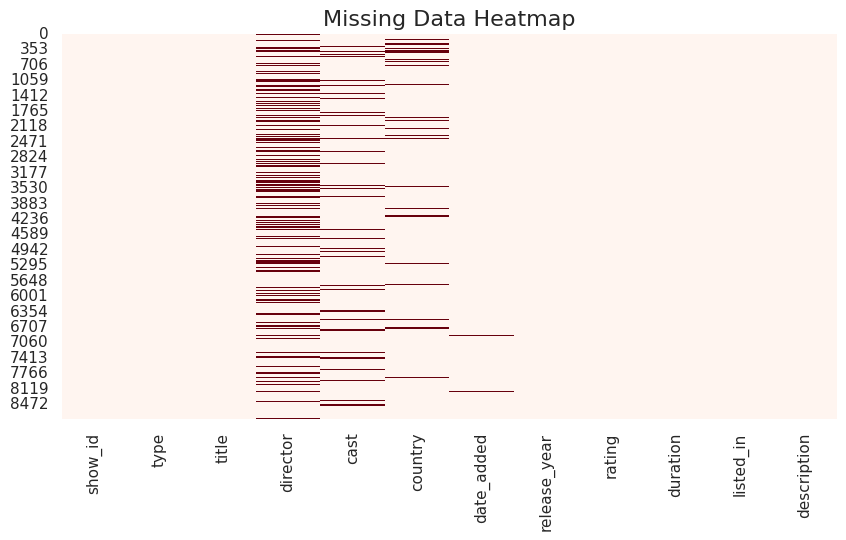

In [8]:
# Step 4: Check Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
# Step 5: Clean & Prepare Data
df.drop_duplicates(inplace=True)
df['date_added'] = df['date_added'].astype(str).str.strip()  # remove leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

print(f"✅ Cleaned data. Null dates: {df['date_added'].isnull().sum()} rows could not be parsed.")
print(f"✅ Dataset shape after cleaning: {df.shape}")

✅ Cleaned data. Null dates: 10 rows could not be parsed.
✅ Dataset shape after cleaning: (8807, 12)


/tmp/ipython-input-2126068794.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [10]:
# Step 6: Add Year Column
df['year_added'] = df['date_added'].dt.year

/tmp/ipython-input-727456342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="Set2")


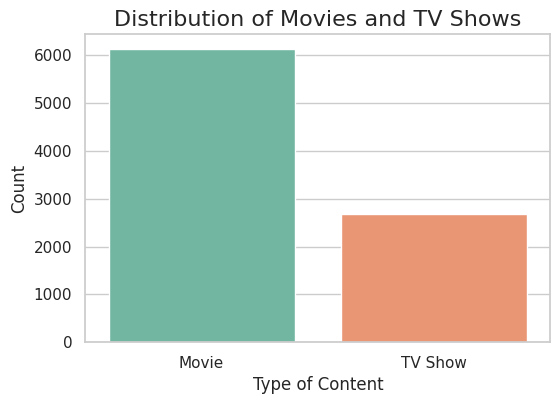

In [11]:
# Step 7: Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette="Set2")
plt.title("Distribution of Movies and TV Shows")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4095041978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


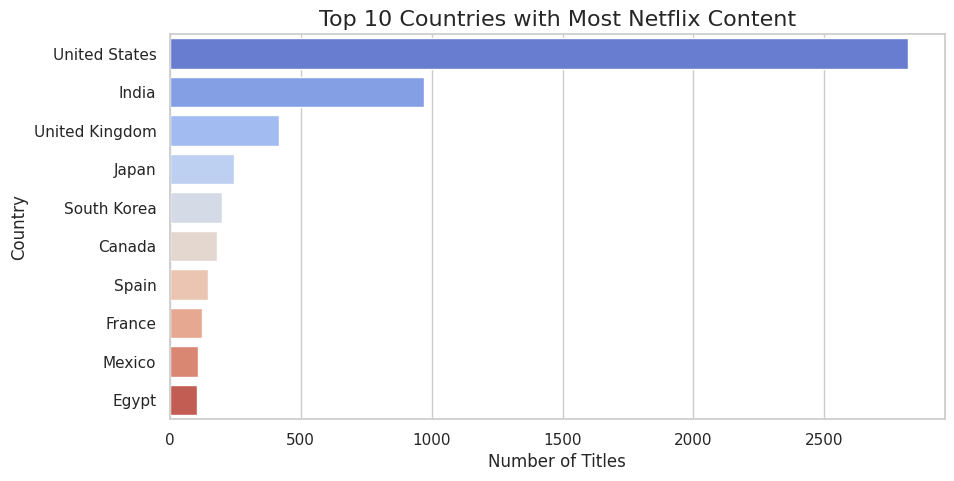

In [12]:
# Step 8: Top 10 Countries Producing Most Content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-802999475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="mako")


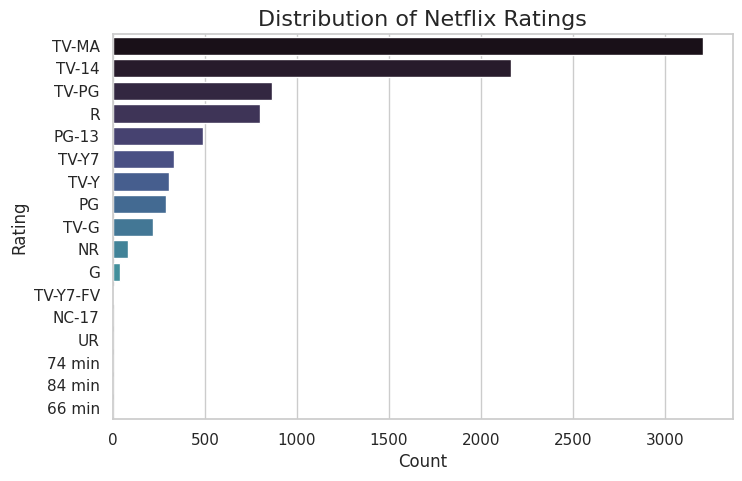

In [13]:
# Step 9: Most Common Ratings
plt.figure(figsize=(8,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette="mako")
plt.title("Distribution of Netflix Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

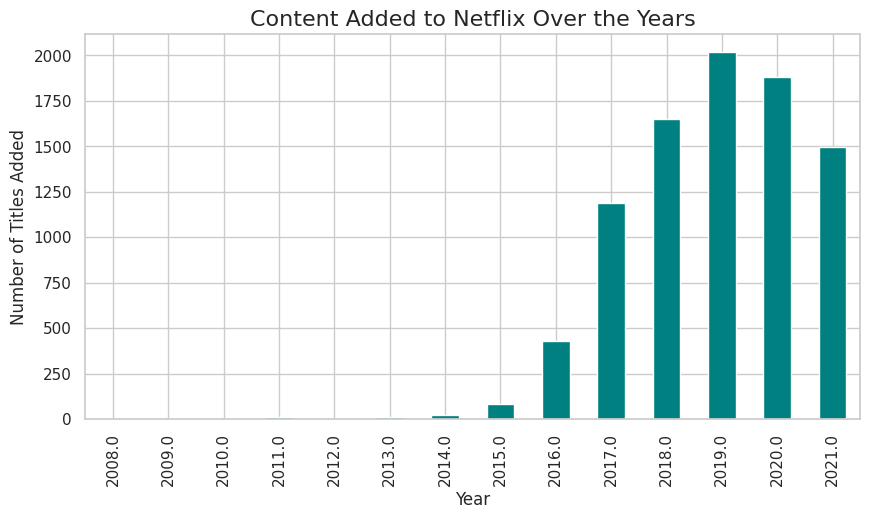

In [14]:
# Step 10: Trend of Content Added Over Time
content_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
content_trend.plot(kind='bar', color='teal')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()



/tmp/ipython-input-218165801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_series.values, y=genre_series.index, palette="viridis")


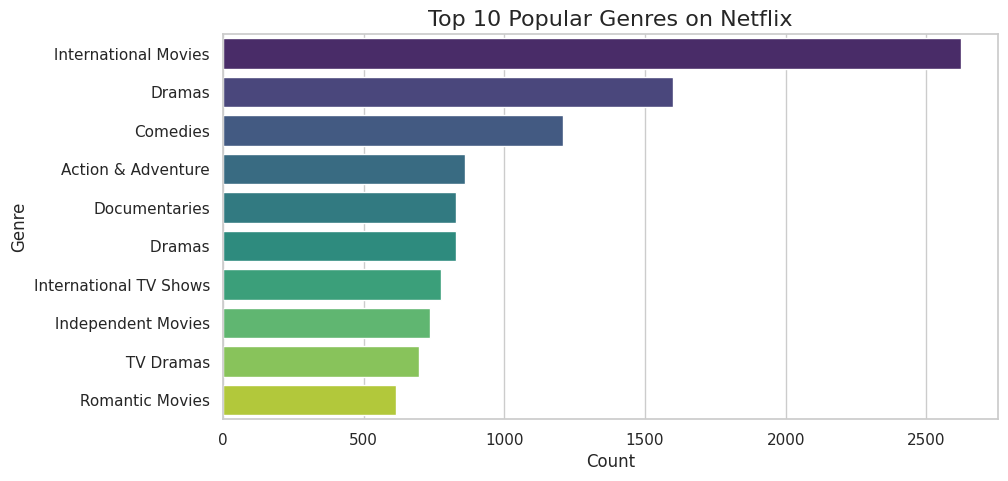

In [15]:
# Step 11: Most Frequent Genres
df['listed_in'] = df['listed_in'].fillna('')
all_genres = ','.join(df['listed_in']).split(',')
genre_series = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_series.values, y=genre_series.index, palette="viridis")
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


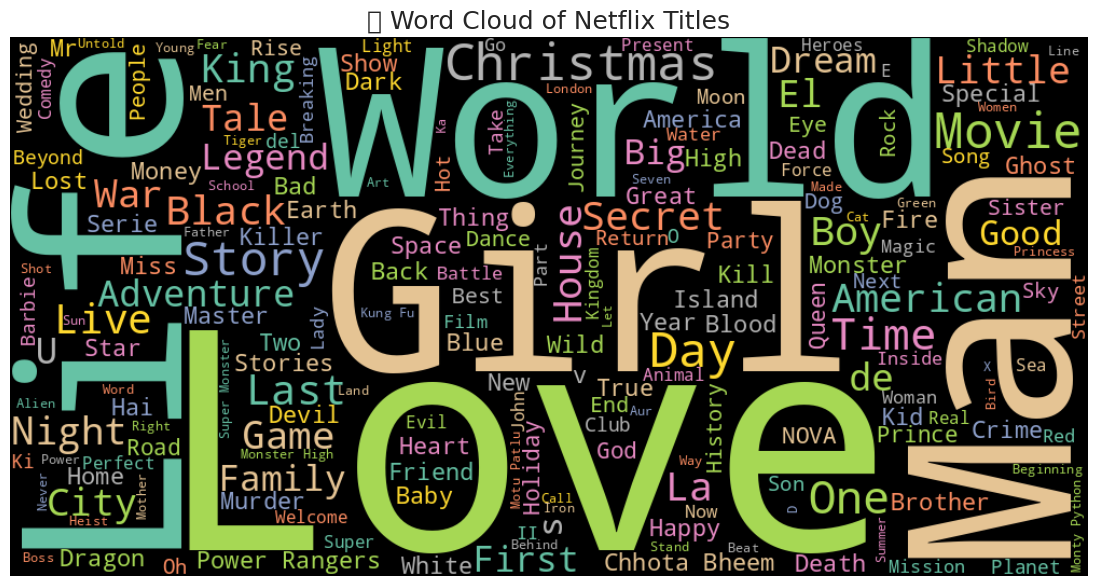

In [16]:
# Step 12: Word Cloud for Movie Titles
movie_titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set2').generate(movie_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🎬 Word Cloud of Netflix Titles", fontsize=18)
plt.show()

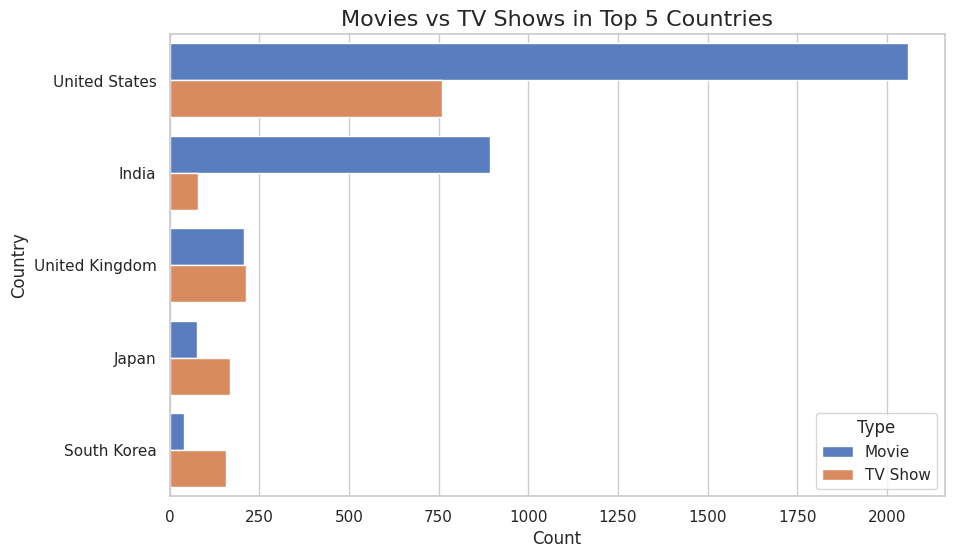

In [17]:
# Step 13: Movies vs TV Shows by Top Countries
top_5_countries = df['country'].value_counts().head(5).index
country_type = df[df['country'].isin(top_5_countries)]
plt.figure(figsize=(10,6))
sns.countplot(y='country', hue='type', data=country_type, palette="muted")
plt.title("Movies vs TV Shows in Top 5 Countries")
plt.xlabel("Count")
plt.ylabel("Country")
plt.legend(title="Type")
plt.show()

/tmp/ipython-input-183444882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace(' min','', regex=True)
/tmp/ipython-input-183444882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')


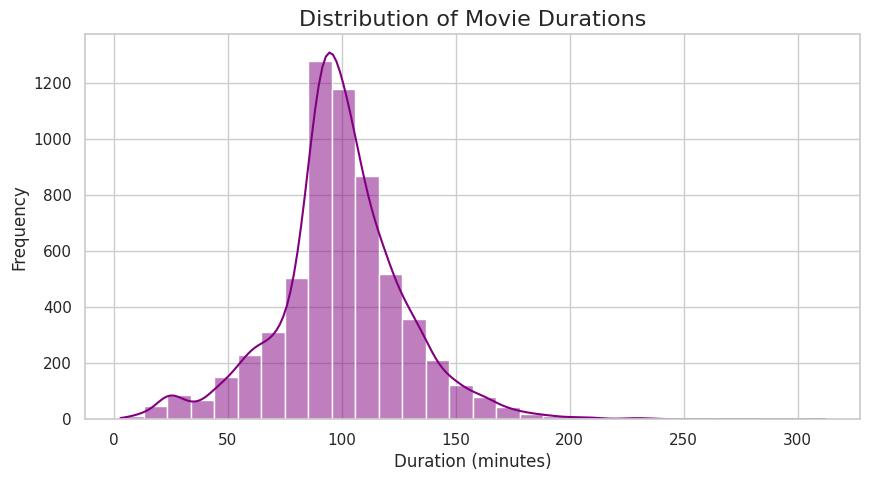

In [18]:
# Step 14: Duration Analysis (Movies only)
movie_df = df[df['type']=='Movie']
movie_df['duration'] = movie_df['duration'].str.replace(' min','', regex=True)
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

plt.figure(figsize=(10,5))
sns.histplot(movie_df['duration'].dropna(), bins=30, kde=True, color='purple')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

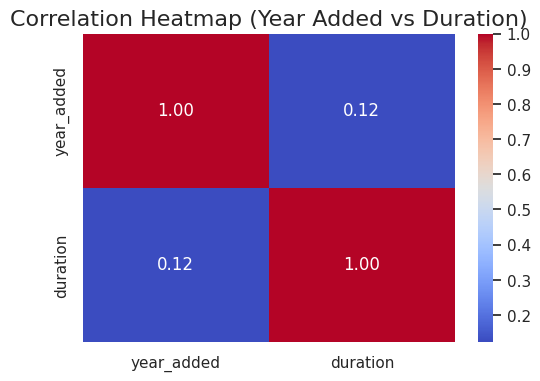

In [19]:
# Step 15: 🔍 Correlation Heatmap
corr_data = pd.DataFrame({
    'year_added': df['year_added'],
    'duration': movie_df['duration']
}).dropna()

plt.figure(figsize=(6,4))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Year Added vs Duration)")
plt.show()

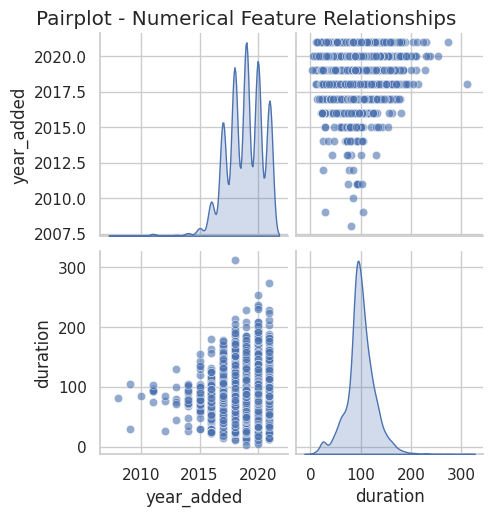

In [20]:
# Step 16: Pairplot for Numeric Relationships
sns.pairplot(corr_data, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Pairplot - Numerical Feature Relationships", y=1.02)
plt.show()

In [21]:
# Step 17: Final Insights
print("✅ EDA Completed Successfully!")
print("""
📌 Key Insights:
1️⃣ Movies dominate Netflix’s content library.
2️⃣ The USA and India contribute the most content.
3️⃣ TV-MA and TV-14 are the most common ratings.
4️⃣ Netflix’s content library grew rapidly after 2015.
5️⃣ Dramas and Comedies are the most popular genres.
6️⃣ Weak correlation between year of addition and movie duration.
""")

✅ EDA Completed Successfully!

📌 Key Insights:
1️⃣ Movies dominate Netflix’s content library.
2️⃣ The USA and India contribute the most content.
3️⃣ TV-MA and TV-14 are the most common ratings.
4️⃣ Netflix’s content library grew rapidly after 2015.
5️⃣ Dramas and Comedies are the most popular genres.
6️⃣ Weak correlation between year of addition and movie duration.

